### Importing Dependency

In [23]:
import os 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

# Set Working Directory
os.chdir("E:/Analysis/Practice/Cpoint5")
os.getcwd()

'E:\\Analysis\\Practice\\Cpoint5'

### Load Data

In [24]:
# Loading Data (Inventory_Data)
df_inventory = pd.read_excel("Inventory Dataset.xlsx")
print("Inventory_Data")
print(df_inventory.head())
print("\n")

# Data Information
print("Inventory_Data Information :")
df_inventory.info()
print("\n")

Inventory_Data
   Item Number       Date  Inventory
0  064-01-1347 2023-06-17       3561
1  064-01-1361 2023-06-17       4035
2  064-01-1375 2023-06-17       2684
3  064-01-1385 2023-06-17       5136
4  064-01-1399 2023-06-17       6399


Inventory_Data Information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Item Number  356 non-null    object        
 1   Date         356 non-null    datetime64[ns]
 2   Inventory    356 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.5+ KB




In [25]:
# Loading Data (New_Inventory_Data)
df_new_inventory = pd.read_excel("New Inventory.xlsx")
print("New_Inventory_Data")
print(df_new_inventory.head())
print("\n")

# Data Information
print("New_Inventory_Data Information :")
df_new_inventory.info()
print("\n")

# Change column Names as per "Inventory_Data"
df_new_inventory.rename(columns = {'Inventory Receive':'Date', 'Total Item Qty':'Inventory'}, inplace = True)
print("Updated Information :")
df_new_inventory.info()

New_Inventory_Data
   Item Number Inventory Receive  Total Item Qty
0  064-13-0002        2023-07-07             700
1  064-13-0338        2023-07-07            1700
2  064-13-0340        2023-07-07            1000
3  064-13-0353        2023-07-07            1900
4  064-13-0416        2023-07-07            1000


New_Inventory_Data Information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Item Number        1039 non-null   object        
 1   Inventory Receive  1039 non-null   datetime64[ns]
 2   Total Item Qty     1039 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 24.5+ KB


Updated Information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       ----

### Exploratory Data Analysis

In [26]:
# Merge Both Data [df_inventory & df_new_inventory]
df_FinalInventory = pd.concat([df_inventory,df_new_inventory])

# Sorting Data by "Date" column
df_FinalInventory.sort_values(by=["Date"], inplace = True)
df_FinalInventory.reset_index(drop = True, inplace = True)

print(df_FinalInventory.head())
print("\n")

# Data Information
print("Data Information :")
df_FinalInventory.info()
print("\n")

# Duplicate Value Analysis
print("Duplicate Value: " + str(df_FinalInventory.duplicated().sum()))
print("\n")

# Missing Value Analysis
print("Missing Value Analysis: \n" + str(df_FinalInventory.isnull().sum()))
print("\n")

   Item Number       Date  Inventory
0  064-01-1347 2023-06-17       3561
1  064-13-0425 2023-06-17        524
2  064-13-0402 2023-06-17        235
3  064-13-0370 2023-06-17        838
4  064-13-0358 2023-06-17       4560


Data Information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Item Number  1395 non-null   object        
 1   Date         1395 non-null   datetime64[ns]
 2   Inventory    1395 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 32.8+ KB


Duplicate Value: 0


Missing Value Analysis: 
Item Number    0
Date           0
Inventory      0
dtype: int64




In [27]:
# Description of the data
print("Description of 'Item Number':")
print(df_FinalInventory["Item Number"].describe())
print("\n")
print("Description of 'Date':")
print(df_FinalInventory["Date"].describe())
print("\n")
print("Description of 'Inventory':")
print(df_FinalInventory["Inventory"].describe())

Description of 'Item Number':
count            1395
unique            403
top       064-18-3729
freq               11
Name: Item Number, dtype: object


Description of 'Date':
count                    1395
unique                     24
top       2023-06-17 00:00:00
freq                      356
first     2023-06-17 00:00:00
last      2023-12-15 00:00:00
Name: Date, dtype: object


Description of 'Inventory':
count     1395.000000
mean      2777.647312
std       3515.541834
min          0.000000
25%        760.000000
50%       1612.000000
75%       3324.500000
max      27104.000000
Name: Inventory, dtype: float64


In [28]:
# Analysis of Item Number by dates
grp_item_number = df_FinalInventory.groupby(['Item Number','Date']).sum()
grp_item_number.head()

Inventory
Item Number Date                 
064-01-0003 2023-09-29       5488
            2023-10-13       1864
064-01-0005 2023-09-29       7380
            2023-10-13       2520
064-01-0006 2023-06-17         10

### Weekly Inventory Analysis 

In [29]:
# Weekly Inventory Analysis 
pivoted_Weekly = pd.pivot_table(df_FinalInventory, values="Inventory", index="Item Number", \
                                columns=pd.Grouper(freq="1W", key="Date"))
pivoted_Weekly.columns.name=None
# Replacing Null Values with 0
pivoted_Weekly.fillna(0, inplace = True)
pivoted_Weekly

,2023-06-18,2023-07-09,2023-07-16,2023-07-23,2023-07-30,2023-08-06,2023-08-20,2023-08-27,2023-09-10,2023-09-17,2023-09-24,2023-10-01,2023-10-08,2023-10-15,2023-10-22,2023-11-26,2023-12-03,2023-12-10,2023-12-17
Item Number,,,,,,,,,,,,,,,,,,,
064-01-0003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5488.0,0.0,1864.0,0.0,0.0,0.0,0.0,0.0
064-01-0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7380.0,0.0,2520.0,0.0,0.0,0.0,0.0,0.0
064-01-0006,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
064-01-0012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6840.0,0.0,3244.0,0.0,0.0,0.0,0.0,0.0
064-01-0013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6300.0,0.0,1748.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
064-18-9884,12419.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
064-18-9904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18700.0,0.0,5100.0
064-18-9909,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Monthly Inventory Analysis

In [30]:
# Monthly Inventory Analysis 
pivoted_Monthly = pd.pivot_table(df_FinalInventory, values="Inventory", index="Item Number", \
                                 columns=pd.Grouper(freq="1M", key="Date"))
pivoted_Monthly.columns.name=None
# Replacing Null Values with 0
pivoted_Monthly.fillna(0, inplace = True)
pivoted_Monthly

,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
Item Number,,,,,,,
064-01-0003,0.0,0.0,0.0,5488.0,1864.0,0.0,0.0
064-01-0005,0.0,0.0,0.0,7380.0,2520.0,0.0,0.0
064-01-0006,10.0,0.0,0.0,0.0,0.0,0.0,0.0
064-01-0012,0.0,0.0,0.0,6840.0,3244.0,0.0,0.0
064-01-0013,0.0,0.0,0.0,6300.0,1748.0,0.0,0.0
...,...,...,...,...,...,...,...
064-18-9884,12419.0,0.0,0.0,0.0,0.0,0.0,0.0
064-18-9904,0.0,0.0,0.0,0.0,0.0,0.0,11900.0
064-18-9909,12.0,0.0,0.0,0.0,0.0,0.0,0.0


### Total Monthly Inventory Levels

In [31]:
# Analysis of total monthly inventory levels
total_monthly_inventory = pd.DataFrame(round(pivoted_Monthly.sum()), columns=["Total Inventory"])
total_monthly_inventory

,Total Inventory
2023-06-30,1388034.0
2023-07-31,298288.0
2023-08-31,426620.0
2023-09-30,505543.0
2023-10-31,276970.0
2023-11-30,24848.0
2023-12-31,39662.0


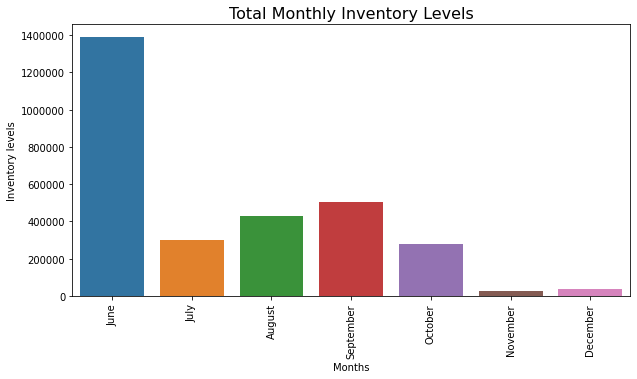

In [32]:
# Create a bar plot of total monthly inventory levels
plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain')
ax = sns.barplot(x=total_monthly_inventory.index.month_name(), y=total_monthly_inventory["Total Inventory"])
plt.xticks(rotation="vertical")
ax.set_xlabel('Months')
ax.set_ylabel('Inventory levels')
plt.title('Total Monthly Inventory Levels', fontsize=16);